# File Setup

In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts 
import random as random
import requests
import sys
from pprint import pprint
from citipy import citipy #https://github.com/wingchen/citipy

#plot style
plt.style.use('dark_background')

#api-key in different folder, so need to adjust filepath
sys.path.append("/Users/Chrismus Time/Desktop/upenn-datacamp-2021/homework-repo/python-api-challenge")

#importing api keys
from config import api_key
from config import gkey

# Creating Relevant Database

### Creating Database of City Name, City Country

In [2]:
#creating empty lists to hold 500 random cities' data
city_names, city_countries = [], []

#set number of cities
number_of_cities = 500

#create list of 500 unique cities
while (len(city_names) < number_of_cities):
    #long, lat world limits are +- 180, +-90
    citi_obj = citipy.nearest_city(random.uniform(-90.0000, 90.0000), random.uniform(-180.0000, 180.0000))
    #only append if the city name is unique
    if (citi_obj.city_name not in city_names):
        city_names.append(citi_obj.city_name)
        city_countries.append(citi_obj.country_code)

In [3]:
#creating dictionary
city_dict = {
    "City" : city_names,
    "Country" : city_countries
}

#convert to dataframe
city_df = pd.DataFrame(city_dict)
print(f"The city database has {len(city_df['City'].unique().tolist())} unique cities.")
city_df.head()

The city database has 500 unique cities.


,City,Country
0,albany,au
1,victoria,sc
2,masuguru,tz
3,hobart,au
4,lebu,cl


### Fetching Data for Cities
- Latitude
- Longitude
- Temperature (F)
- Humidity (%)
- Cloudiness (%)
- Wind Speed (mph)

In [4]:
#GEO url setup
geo_params = {
    'address' : '', #empty, will populated in forloop below
    'key' : gkey
}
geo_url = 'https://maps.googleapis.com/maps/api/geocode/json'

#OPENWEATHER url setup
openweather_params = {
    'q' : '', #empty, will populated in forloop below
    'units' : 'imperial',
    'appid' : api_key
}
openweather_url = 'https://api.openweathermap.org/data/2.5/weather'

In [5]:
#setting up empty strings for forloop
lat_ls, lng_ls, temp_ls, humid_ls, cloud_ls, wind_ls = [], [], [], [], [], []
column_values = [lat_ls, lng_ls, temp_ls, humid_ls, cloud_ls, wind_ls]
column_headers = ['Latitude', 'Longitude', 'Temp (F)', 'Humidity (%)', 'Clouds (%)', 'Wind Speed (mph)']
function_list = ["geo_response['results'][0]['geometry']['location']['lat']",
                 "geo_response['results'][0]['geometry']['location']['lng']",
                 "openweather_response['main']['temp']",
                 "openweather_response['main']['humidity']",
                 "openweather_response['clouds']['all']",
                 "openweather_response['wind']['speed']"]

In [6]:
#setting up counter variables for printing out progress of the next cellblock
counter = 0
found = False

###### Cell block takes a long time to run
- |
- v

In [7]:
#populating lists with relevant data
for n in range(len(city_names)): #for every city...
    #adding the relevant api parameter
    geo_params['address'] = city_names[n] #google geocode
    openweather_params['q'] = city_names[n] #openweather
    #fetching API data
    geo_response = requests.get(geo_url, params = geo_params).json()
    openweather_response = requests.get(openweather_url, params = openweather_params).json()
    for i in range(len(column_values)):
        if (i < 2): #if index is at either lat_ls or lng_ls
            try:
                column_values[i].append(eval(function_list[i]))
                found = True
            except:
                column_values[i].append(np.NaN)
                found = False
        else: #if index is at temp, humd, cloud, wind
            try:
                column_values[i].append(eval(function_list[i]))
                found = True
            except:
                column_values[i].append(np.NaN)
                found = False
    if (found == True): #due to the logic gate in the forloop above, only if city returns values for every metric will counter increase by 1
        counter += 1
        print(f"{city_names[n]} found as #{counter}, step {n+1}/{len(city_names)}.")
    else:
        print(f"{city_names[n]} has missing values, step {n+1}/{len(city_names)}.")
    found = False #resetting for next city

albany found as #1, step 1/500.
victoria found as #2, step 2/500.
masuguru found as #3, step 3/500.
hobart found as #4, step 4/500.
lebu found as #5, step 5/500.
belushya guba has missing values, step 6/500.
ginir found as #6, step 7/500.
colgong found as #7, step 8/500.
petropavlovka found as #8, step 9/500.
cidreira found as #9, step 10/500.
dikson found as #10, step 11/500.
abu zabad found as #11, step 12/500.
traverse city found as #12, step 13/500.
hervey bay found as #13, step 14/500.
souillac found as #14, step 15/500.
khuzdar found as #15, step 16/500.
butaritari found as #16, step 17/500.
kidal found as #17, step 18/500.
atuona found as #18, step 19/500.
rikitea found as #19, step 20/500.
kaitangata found as #20, step 21/500.
jamestown found as #21, step 22/500.
hithadhoo found as #22, step 23/500.
barrow found as #23, step 24/500.
emerald found as #24, step 25/500.
qaanaaq found as #25, step 26/500.
puerto ayora found as #26, step 27/500.
taolanaro has missing values, step 28

constitucion found as #198, step 216/500.
ruatoria has missing values, step 217/500.
yaan found as #199, step 218/500.
ottumwa found as #200, step 219/500.
tasiilaq found as #201, step 220/500.
saint-philippe found as #202, step 221/500.
avera found as #203, step 222/500.
zeya found as #204, step 223/500.
ouesso found as #205, step 224/500.
hanumangarh found as #206, step 225/500.
varde found as #207, step 226/500.
sergeyevka found as #208, step 227/500.
hermanus found as #209, step 228/500.
ambilobe found as #210, step 229/500.
sioux lookout found as #211, step 230/500.
chuy found as #212, step 231/500.
tabialan has missing values, step 232/500.
hualmay found as #213, step 233/500.
meulaboh found as #214, step 234/500.
ponta do sol found as #215, step 235/500.
kisangani found as #216, step 236/500.
katsuura found as #217, step 237/500.
kodiak found as #218, step 238/500.
clarence town found as #219, step 239/500.
rio bueno found as #220, step 240/500.
taoudenni found as #221, step 241

sondershausen found as #393, step 428/500.
port blair found as #394, step 429/500.
muhororo found as #395, step 430/500.
sabha found as #396, step 431/500.
polyarnyye zori found as #397, step 432/500.
mount isa found as #398, step 433/500.
kemijarvi found as #399, step 434/500.
maragogi found as #400, step 435/500.
rayachoti found as #401, step 436/500.
myanaung found as #402, step 437/500.
rosita found as #403, step 438/500.
inirida found as #404, step 439/500.
santa fe found as #405, step 440/500.
strelna found as #406, step 441/500.
kahului found as #407, step 442/500.
malwan has missing values, step 443/500.
slave lake found as #408, step 444/500.
komsomolskiy found as #409, step 445/500.
nome found as #410, step 446/500.
jinchang found as #411, step 447/500.
fairlie found as #412, step 448/500.
sept-iles found as #413, step 449/500.
lolua has missing values, step 450/500.
coquimbo found as #414, step 451/500.
nyurba found as #415, step 452/500.
praya found as #416, step 453/500.
r

In [8]:
#adding values to the df
for i in range(len(column_values)):
    city_df[column_headers[i]] = column_values[i]
city_df.head()

,City,Country,Latitude,Longitude,Temp (F),Humidity (%),Clouds (%),Wind Speed (mph)
0,albany,au,42.652579,-73.756232,42.66,85.0,2.0,3.00
1,victoria,sc,36.994874,-78.227220,77.86,77.0,74.0,3.00
2,masuguru,tz,-11.349025,38.429997,95.56,25.0,8.0,5.70
3,hobart,au,41.532259,-87.255035,41.61,74.0,40.0,1.99
4,lebu,cl,-37.608048,-73.651491,57.15,72.0,100.0,15.90


In [9]:
#cleaning data of all the NaN
clean_df = city_df.dropna(how = 'any').reset_index().drop("index", axis = 1)
print(f"Removed {len(city_df['City']) - len(clean_df['City'])} NaN's, have {len(clean_df['City'])} data points now.")
clean_df.head()

Removed 40 NaN's, have 460 data points now.


,City,Country,Latitude,Longitude,Temp (F),Humidity (%),Clouds (%),Wind Speed (mph)
0,albany,au,42.652579,-73.756232,42.66,85.0,2.0,3.00
1,victoria,sc,36.994874,-78.227220,77.86,77.0,74.0,3.00
2,masuguru,tz,-11.349025,38.429997,95.56,25.0,8.0,5.70
3,hobart,au,41.532259,-87.255035,41.61,74.0,40.0,1.99
4,lebu,cl,-37.608048,-73.651491,57.15,72.0,100.0,15.90


# Plotting the Data

In [10]:
#reseting list variable for easier for-plotting
column_headers = ['Temp (F)', 'Humidity (%)', 'Clouds (%)', 'Wind Speed (mph)']

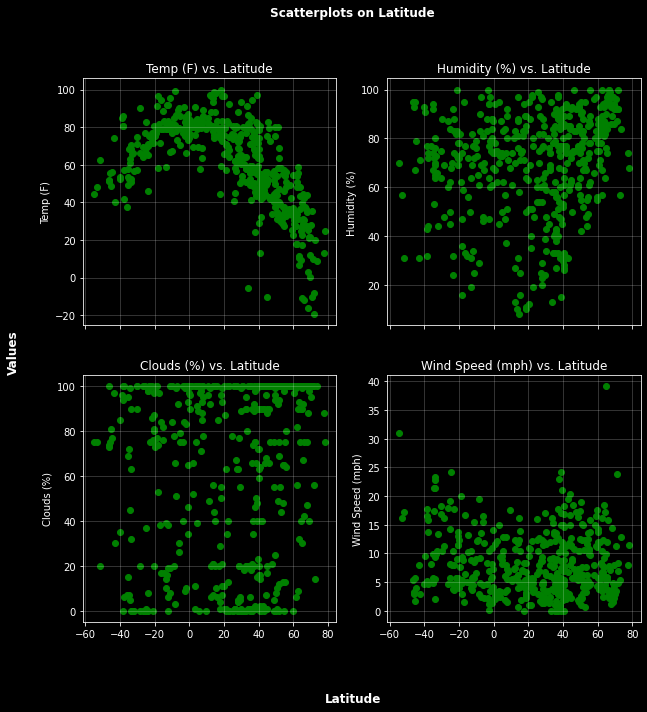

In [11]:
#scatterplot setup
fig, ((gr0, gr1), (gr2, gr3)) = plt.subplots(2, 2, sharex = True, figsize = (10,10))
fig.suptitle("Scatterplots on Latitude", fontweight = 'bold')
fig.supxlabel("Latitude", fontweight = 'bold')
fig.supylabel("Values", fontweight = 'bold')

#plotting graph
for i in range(len(column_headers)): #len(4) because we are scatterplotting across 4 subplots, 2-6 is the index position of our data
    #plot scatter
    eval(f"gr{i}").scatter(clean_df['Latitude'], clean_df[column_headers[i]], color = 'green')
    #set grid background
    eval(f"gr{i}").grid(alpha = 0.25)
    #add ylabels
    plt.setp(eval(f"gr{i}"), ylabel = column_headers[i], title = f"{column_headers[i]} vs. Latitude")    

### Plot Descriptions
1. Temperature (F) scatterplot charts temperatures against latitudes in hopes of finding a correlation between the two.
2. Humidity (%) scatterplot charts temperatures against humidity in hopes of finding a correlation between the two. 
3. Cloudiness (%) scatterplot charts temperatures against cloudiness in hopes of finding a correlation between the two.
4. Wind Speed (mph) scatterplot charts temperatures against windspeed in hopes of finding a correlation between the two.

# Linear Regression

### Preliminary Graphing onto Subplots

In [12]:
#finding null island
#testing if there any values at exactly 0 latitude and pulling it out
if (clean_df.loc[clean_df['Latitude'] == 0].size == 0):
    print(f"There are no latitudes at 0.")
else:
    print(clean_df.loc[clean_df['Latitude'] == 0])

There are no latitudes at 0.


In [13]:
#separating into northern and southern hemispheres, used in graphs below
north_df = clean_df.loc[clean_df['Latitude'] > 0]
south_df = clean_df.loc[clean_df['Latitude'] < 0]

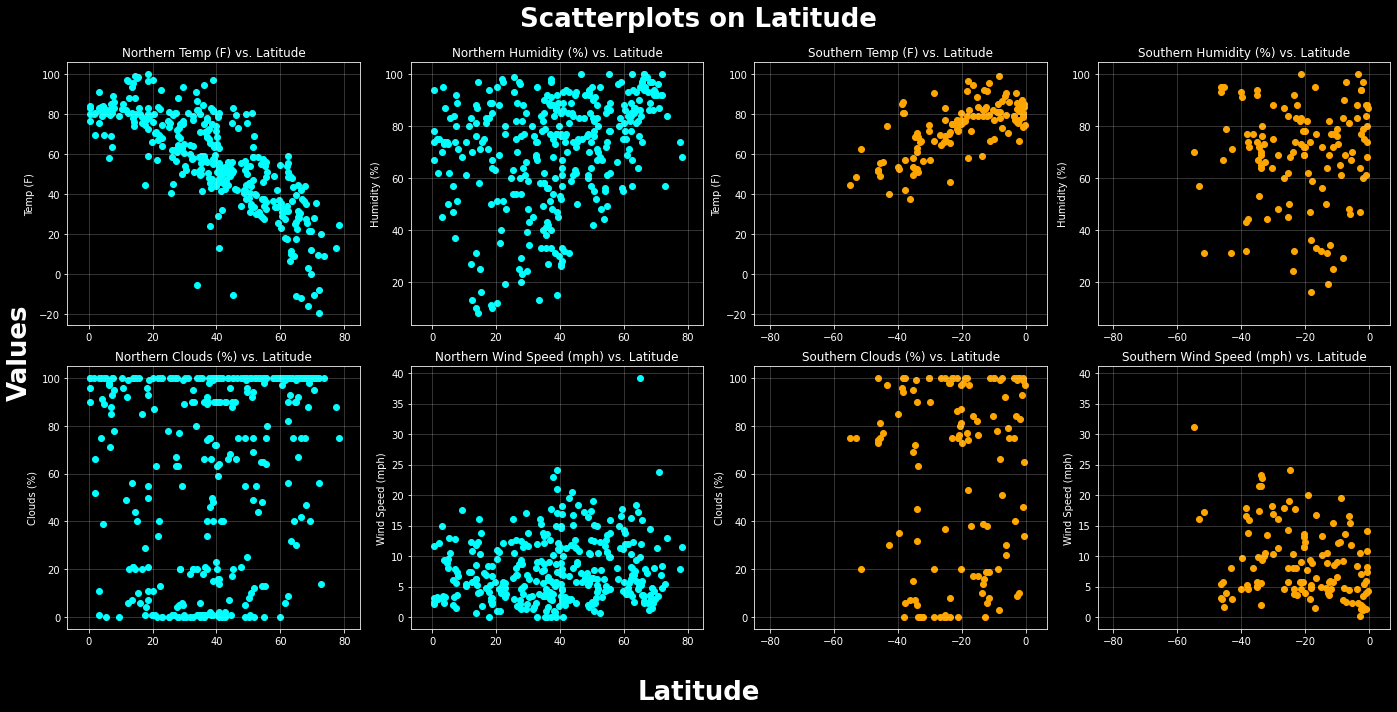

In [14]:
#graph variables
selected_fontsize = 26
selected_padding = 2
selected_figsize = (20, 10)

#setting up graph
fig, ((gr0, gr1, gr4, gr5), (gr2, gr3, gr6, gr7)) = plt.subplots(2, 4, figsize = selected_figsize)
#labeling gr2,3,4,5 for northern; gr8,9,10,11 for southern; labeling is for same reason as above
fig.suptitle("Scatterplots on Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supxlabel("Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supylabel("Values", fontsize = selected_fontsize, fontweight = 'bold')
fig.tight_layout(pad = selected_padding)

#standardizing the x and ylims of subplots
#temp storage variables for tracking the max/min yvalue of each subplot
temp_max_list, temp_min_list = [], []
for j in range(2): # assigning the first pass (j=0) to be solving for ylims, then (j=1) to be solving for xlims 
    if (j == 0): #if solving for ylims
        selected_column_a = 'north_df[column_headers[i]]'
        selected_column_b = 'south_df[column_headers[i]]'
    else:
        selected_column_a = "north_df['Latitude']"
        selected_column_b = "south_df['Latitude']"
    for i in range(len(column_headers)):
        #calculating populating the max and min of every north-south subplot pair
        temp_max_list.append(max(max(eval(selected_column_a)), max(eval(selected_column_b))))
        temp_min_list.append(min(min(eval(selected_column_a)), min(eval(selected_column_b))))
        #dynamically calculating the padding for ylim values 
        range_padding = (temp_max_list[i] - temp_min_list[i]) * .05 #5% is arbitrary value
        if (j == 0):
            #apply the ylims to each subplot, which is the max and min values with the "range padding" applied above/below it
            eval(f"gr{i}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
            eval(f"gr{i + 4}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
        else:
            #calculating the n for southern xlim(-n,0) and northern xlim(0,n) for 
            distance_from_zero = max(abs(temp_max_list[i]), abs(temp_min_list[i]))
            #apply the xlims to each subplot
            eval(f"gr{i}").set_xlim(0 - range_padding, distance_from_zero + range_padding)
            eval(f"gr{i + 4}").set_xlim(-1 * distance_from_zero - range_padding, 0 + range_padding)
    temp_max_list, temp_min_list = [], [] #resetting lists for j=1

#plotting scatterplots
for j in range(2): #dividing subplots into northern gr(0,1,2,3) and southern gr(4,5,6,7)
    if (j == 0): #if in the first half of the subplots, aka the northern ones
        selected_df = 'north_df'
        selected_color = 'cyan'
        gr_index_adjustment = 0
        title = 'Northern'
    else:
        selected_df = 'south_df'
        selected_color = 'orange'
        gr_index_adjustment = 4 #allows referencing gr8,9,10,11 using the same range of 2,3,4,5
        title = 'Southern'
    for i in range(len(column_headers)): #plotting the subplots within each hemisphere
        eval(f"gr{i + gr_index_adjustment}").scatter(eval(selected_df)['Latitude'], eval(selected_df)[column_headers[i]], color = selected_color)
        eval(f"gr{i + gr_index_adjustment}").grid(alpha = 0.25)
        plt.setp(eval(f"gr{i + gr_index_adjustment}"), ylabel = column_headers[i], title = f"{title} {column_headers[i]} vs. Latitude")

### Finding Linear Regressions

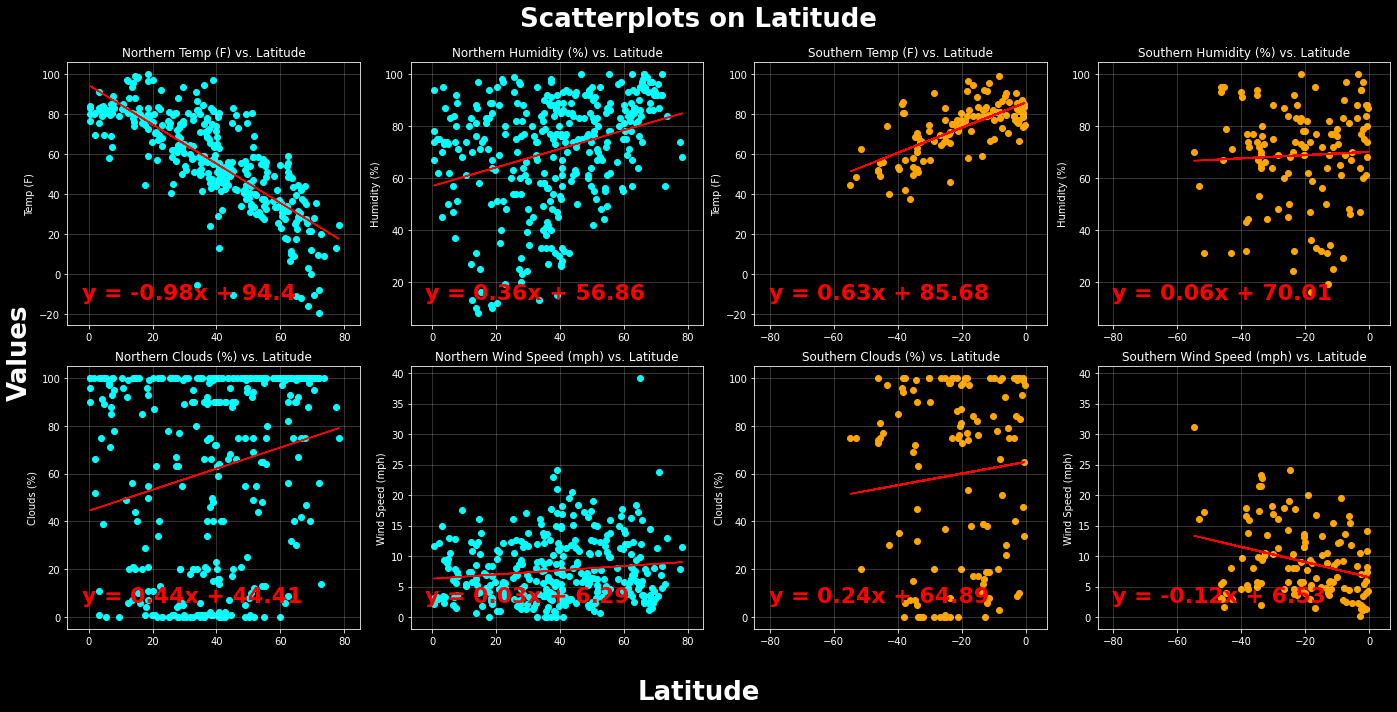

In [15]:
###################################################################
############### COPY OF SCATTERPLOT CODE FROM ABOVE ###############
###################################################################
#setting up graph
fig, ((gr0, gr1, gr4, gr5), (gr2, gr3, gr6, gr7)) = plt.subplots(2, 4, figsize = selected_figsize)
#labeling gr2,3,4,5 for northern; gr8,9,10,11 for southern; labeling is for same reason as above
fig.suptitle("Scatterplots on Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supxlabel("Latitude", fontsize = selected_fontsize, fontweight = 'bold')
fig.supylabel("Values", fontsize = selected_fontsize, fontweight = 'bold')
fig.tight_layout(pad = selected_padding)

#standardizing the x and ylims of subplots
#temp storage variables for tracking the max/min yvalue of each subplot
temp_max_list, temp_min_list = [], []
for j in range(2): # assigning the first pass (j=0) to be solving for ylims, then (j=1) to be solving for xlims 
    if (j == 0): #if solving for ylims
        selected_column_a = 'north_df[column_headers[i]]'
        selected_column_b = 'south_df[column_headers[i]]'
    else:
        selected_column_a = "north_df['Latitude']"
        selected_column_b = "south_df['Latitude']"
    for i in range(len(column_headers)):
        #calculating populating the max and min of every north-south subplot pair
        temp_max_list.append(max(max(eval(selected_column_a)), max(eval(selected_column_b))))
        temp_min_list.append(min(min(eval(selected_column_a)), min(eval(selected_column_b))))
        #dynamically calculating the padding for ylim values 
        range_padding = (temp_max_list[i] - temp_min_list[i]) * .05 #5% is arbitrary value
        if (j == 0):
            #apply the ylims to each subplot, which is the max and min values with the "range padding" applied above/below it
            eval(f"gr{i}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
            eval(f"gr{i + 4}").set_ylim(temp_min_list[i] - range_padding, temp_max_list[i] + range_padding)
        else:
            #calculating the n for southern xlim(-n,0) and northern xlim(0,n) for 
            distance_from_zero = max(abs(temp_max_list[i]), abs(temp_min_list[i]))
            #apply the xlims to each subplot
            eval(f"gr{i}").set_xlim(0 - range_padding, distance_from_zero + range_padding)
            eval(f"gr{i + 4}").set_xlim(-1 * distance_from_zero - range_padding, 0 + range_padding)
    temp_max_list, temp_min_list = [], [] #resetting lists for j=1

#plotting scatterplots
for j in range(2): #dividing subplots into northern gr(0,1,2,3) and southern gr(4,5,6,7)
    if (j == 0): #if in the first half of the subplots, aka the northern ones
        selected_df = 'north_df'
        selected_color = 'cyan'
        gr_index_adjustment = 0
        title = 'Northern'
    else:
        selected_df = 'south_df'
        selected_color = 'orange'
        gr_index_adjustment = 4 #allows referencing gr8,9,10,11 using the same range of 2,3,4,5
        title = 'Southern'
    for i in range(len(column_headers)): #plotting the subplots within each hemisphere
        eval(f"gr{i + gr_index_adjustment}").scatter(eval(selected_df)['Latitude'], eval(selected_df)[column_headers[i]], color = selected_color)
        eval(f"gr{i + gr_index_adjustment}").grid(alpha = 0.25)
        plt.setp(eval(f"gr{i + gr_index_adjustment}"), ylabel = column_headers[i], title = f"{title} {column_headers[i]} vs. Latitude")
###################################################################
###################################################################
###################################################################

#calculating linreg for north and south
for j in range(2): # j=0 is north, j=1 is south
    if (j == 0):
        selected_column_a = "north_df['Latitude']"
        selected_column_b = "north_df[column_headers[i]]"
        gr_index_adjustment = 0
    else:
        selected_column_a = "south_df['Latitude']"
        selected_column_b = "south_df[column_headers[i]]"
        gr_index_adjustment = 4
    for i in range(len(column_headers)):
        (m, b, r, pval, stderr) = sts.linregress(eval(selected_column_a), eval(selected_column_b))
        #calculating linreg line (aka its yvalues)
        temp_linreg_yvalues = m * eval(selected_column_a) + b
        #creating the lingreg label
        temp_linreg_label = f"y = {round(m, 2)}x + {round(b, 2)}"       
        #graphing
        eval(f"gr{i + gr_index_adjustment}").plot(eval(selected_column_a), temp_linreg_yvalues, color = 'red')
        eval(f"gr{i + gr_index_adjustment}").annotate(temp_linreg_label, xy = (0.05, 0.1), xycoords = 'axes fraction', color = 'red', fontsize = 22, fontweight = 'bold')

#saving figure        
plt.savefig("figure.png")

#saving dataframe
city_df.to_csv("dataframe.csv")

### Plot Descriptions
1. The northern hemisphere scatterplots seems to have the stronger correlations when compared to the southern hemisphere's. For example, cloudiness in the northern hemisphere is significantly more correlated than cloudiness with the southern.
2. Temperature has a moderate correlation with the latitude, which affirms our original suspicion. Temperature decreases as you approach the poles.
3. From the sample size of 500, it seems like there are just fewer cities in the southern hemisphere than in the northern hemisphere.